In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

In [24]:
def error_rmse(org, pred):
    return np.sqrt(np.mean((org - pred) ** 2))

In [25]:
def model_func(x, params):
    a, b = params
    return a * np.exp(b * x)

In [26]:
def residual_func(params, x, y):
    return model_func(x, params) - y

In [27]:
def jacobian(x, params):
    a, b = params
    return np.column_stack([np.exp(b * x), a * x * np.exp(b * x)])

In [28]:
def gauss_newton(x, y, initial_params, max_iter=1000, tol=1e-3):
    params = np.array(initial_params)

    for _ in range(max_iter):
        # Calculate the function value and Jacobian with current parameters
        f = model_func(x, params)
        J = jacobian(x, params)

        # Solve the linear least squares problem to update parameters
        residuals = y - f
        delta = np.linalg.lstsq(J, residuals, rcond=None)[0]
        params += delta

        # Check for convergence (stop if the magnitude of delta is below tol)
        if np.linalg.norm(delta) < tol:
            break

    return params

In [29]:
file_path = '../out/lnLambda-predQP.json'
data = pd.read_json(file_path)

In [30]:
x_data = data['ax'].to_numpy()
y_data = data['ay'].to_numpy()
initial_params = [1.0, 0.5]

In [31]:
# custom library
custom_params = gauss_newton(x_data, y_data, initial_params)
print("custom parameters:", custom_params)

custom parameters: [19.17597637  0.0985127 ]


In [32]:
# scipy library
scipy_params = least_squares(residual_func, initial_params, args=(x_data, y_data), method='lm').x
print("scipy parameters:", scipy_params)

scipy parameters: [19.17598879  0.09851261]


In [33]:
x_range = np.linspace(min(x_data), max(x_data))
cy_fit = model_func(x_range, custom_params)
sy_fit = model_func(x_range, scipy_params)

In [34]:
# calculating RMSE
custom_pred = model_func(x_data, custom_params)
scipy_pred = model_func(x_data, scipy_params)
custom_mse = error_rmse(y_data, custom_pred)
scipy_mse = error_rmse(y_data, scipy_pred)
print("RMSE from custom library:", custom_mse)
print("RMSE from scipy library:", scipy_mse)

RMSE from custom library: 1.0016098931817012
RMSE from scipy library: 1.0016098931744843


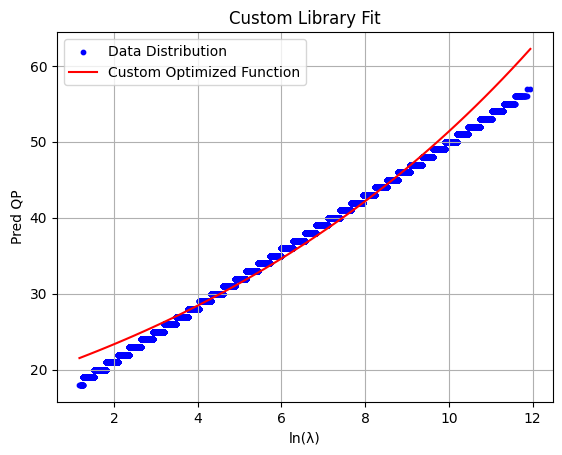

In [35]:
# Graph 1: Custom Library
plt.scatter(x_data, y_data, label='Data Distribution', color='blue', marker='o', s=10)
plt.plot(x_range, cy_fit, label='Custom Optimized Function', color='red')
plt.xlabel('ln(λ)')
plt.ylabel('Pred QP')
plt.title('Custom Library Fit')
plt.legend()
plt.grid(True)

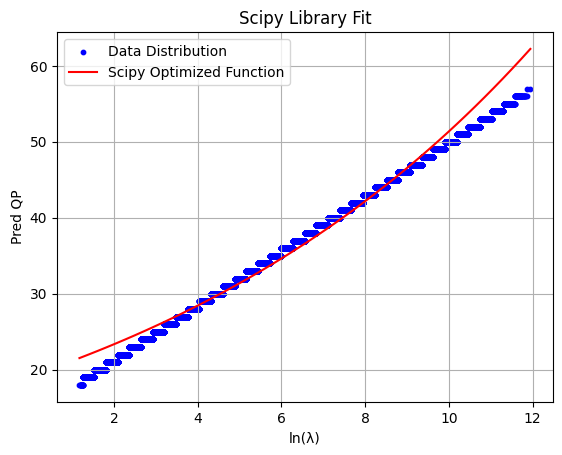

In [36]:
# Graph 2: Scipy Library
plt.scatter(x_data, y_data, label='Data Distribution', color='blue', marker='o', s=10)
plt.plot(x_range, sy_fit, label='Scipy Optimized Function', color='red')
plt.xlabel('ln(λ)')
plt.ylabel('Pred QP')
plt.title('Scipy Library Fit')
plt.legend()
plt.grid(True)

In [37]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>